<a href="https://colab.research.google.com/github/gabsrebelo/NeuralSymbolic/blob/main/NeuralSymbolic_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuralSymbolic - Demo

## Dependencies

In [ ]:
!pip install keras-rectified-adam

ERROR: Operation cancelled by user


In [ ]:
import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut, KFold
import keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.losses import binary_crossentropy
from keras.utils  import plot_model
#from keras_radam import RAdam
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [ ]:
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


In [ ]:
# if u runing in google's colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## GET data

In [ ]:
# path to trains-transformed.csv
path = '/content/drive/MyDrive/UFAM/IA-TF/trains-transformed.csv'
str_att = {
  'length': ['short', 'long'],
  'shape': ['closedrect', 'dblopnrect', 'ellipse', 'engine', 'hexagon',
          'jaggedtop', 'openrect', 'opentrap', 'slopetop', 'ushaped'],
  'load_shape': ['circlelod', 'hexagonlod', 'rectanglod', 'trianglod'],
  'Class_attribute': ['west','east']
}

def read_data(path=path):
  df = pd.read_csv(path, ',')

  for k in df:
    for att in str_att:
      if k.startswith(att):
        for i,val in enumerate(df[k]):
          if val in str_att[att]:
            df[k][i] = str_att[att].index(val)

  df.replace("None", -1, inplace=True)
  df.replace("\\0", 0, inplace=True)

  return df

df = read_data()
df

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,5,4,2,1,6,3,2,2,0,8,1,3,3,1,6,1,1,2,0,6,1,0,0,1,0,0,0,1,0,0,1,0,1
1,4,3,2,0,9,1,3,2,0,7,1,2,2,0,0,2,0,-1,-1,-1,-1,-1,0,1,0,1,0,0,0,0,0,0,1
2,4,2,2,0,6,1,0,2,0,4,1,3,3,1,0,1,3,-1,-1,-1,-1,-1,0,0,0,0,1,0,1,0,0,0,1
3,5,2,2,0,7,1,3,2,0,1,1,3,2,0,2,1,2,2,0,6,1,2,1,1,0,0,1,0,0,0,0,0,1
4,4,3,2,0,1,1,3,3,1,0,1,2,2,0,0,1,0,-1,-1,-1,-1,-1,0,1,0,1,0,0,0,0,0,0,1
5,3,2,2,1,0,3,0,2,0,6,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,1,0,0,0,0
6,4,2,2,0,1,1,0,2,0,9,1,3,2,1,5,0,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,1,0,0,0,0
7,3,2,3,1,0,1,2,2,0,9,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,1,0,0,0,0,0,0,0
8,5,2,2,0,7,1,0,2,1,5,1,2,2,0,6,1,2,2,0,7,1,0,1,0,0,1,0,0,0,0,0,0,0
9,3,1,2,0,9,1,2,2,1,6,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,0,0,0,0,0,0,0,0


## Question 1.

Implemente uma solução que implemente proposicionalização com 32 features
de entrada, 9 perseptrons e uma única saída (denotando leste). As entradas codi=icam:

In [ ]:
# get data
df = read_data()
Y = np.array(df.pop('Class_attribute'))
X = np.array(df)

### Akin Propositionalization Model

In [ ]:
# define model
def model_v1():
  model = Sequential([
    Dense(9, activation='relu', input_shape=(len(df.keys()),)),
    Dense(1, activation='sigmoid'),
  ])
  model.compile(
    loss = binary_crossentropy, 
    optimizer = "adam",
    metrics = ['mse', 'binary_accuracy']
  ) 
  return model

es = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=1000, verbose=0)

model = model_v1()
model.summary()

Model: "sequential_949"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1898 (Dense)           (None, 9)                 297       
_________________________________________________________________
dense_1899 (Dense)           (None, 1)                 10        
Total params: 307
Trainable params: 307
Non-trainable params: 0
_________________________________________________________________


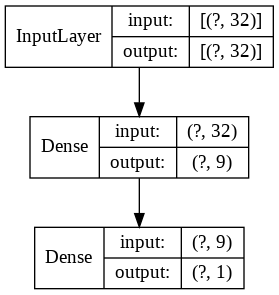

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

### Train

In [ ]:
# train
loo = LeaveOneOut()
hists = dict()
q1_names =  [
  'Train', 
  'Output of flat network', 
  ' Desired output', 
  'Class'
]
q1 = {name: [] for name in q1_names}


for i, (train, test) in tqdm.tqdm(enumerate(loo.split(X)), total=10):
  x_train = X[train]
  y_train = Y[train]
  x_test  = X[test]
  y_test  = Y[test] 

  model = model_v1()
  hist = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    verbose=0,
    #callbacks=[es]
    ) 
  hists[test[0]] = hist

  q1['Train'].append(i)
  q1['Output of flat network'].append(model.predict(x_test)[0][0])
  q1[' Desired output'].append(y_test[0])
  q1['Class'].append(str_att['Class_attribute'][int(y_test)])

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:02<00:19,  2.19s/it]

 20%|██        | 2/10 [00:04<00:17,  2.18s/it]

 30%|███       | 3/10 [00:06<00:15,  2.15s/it]

 40%|████      | 4/10 [00:08<00:12,  2.14s/it]

 50%|█████     | 5/10 [00:10<00:10,  2.19s/it]

 60%|██████    | 6/10 [00:13<00:08,  2.21s/it]

 70%|███████   | 7/10 [00:15<00:06,  2.20s/it]

 80%|████████  | 8/10 [00:17<00:04,  2.21s/it]

 90%|█████████ | 9/10 [00:19<00:02,  2.21s/it]

100%|██████████| 10/10 [00:21<00:00,  2.20s/it]


In [ ]:
model.weights

In [ ]:
print(x_train)


[[ 5  4  2  1  6  3  2  2  0  8  1  3  3  1  6  1  1  2  0  6  1  0  0  1
   0  0  0  1  0  0  1  0]
 [ 4  3  2  0  9  1  3  2  0  7  1  2  2  0  0  2  0 -1 -1 -1 -1 -1  0  1
   0  1  0  0  0  0  0  0]
 [ 4  2  2  0  6  1  0  2  0  4  1  3  3  1  0  1  3 -1 -1 -1 -1 -1  0  0
   0  0  1  0  1  0  0  0]
 [ 5  2  2  0  7  1  3  2  0  1  1  3  2  0  2  1  2  2  0  6  1  2  1  1
   0  0  1  0  0  0  0  0]
 [ 4  3  2  0  1  1  3  3  1  0  1  2  2  0  0  1  0 -1 -1 -1 -1 -1  0  1
   0  1  0  0  0  0  0  0]
 [ 3  2  2  1  0  3  0  2  0  6  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0
   0  0  0  0  1  0  0  0]
 [ 4  2  2  0  1  1  0  2  0  9  1  3  2  1  5  0 -1 -1 -1 -1 -1 -1  0  0
   0  0  0  0  1  0  0  0]
 [ 3  2  3  1  0  1  2  2  0  9  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0
   0  1  0  0  0  0  0  0]
 [ 5  2  2  0  7  1  0  2  1  5  1  2  2  0  6  1  2  2  0  7  1  0  1  0
   0  1  0  0  0  0  0  0]]


In [ ]:
# ACABEI NÃO USANDO ESSA PARTE PQ N DA PRA ADICIONAR UMA tf..variable COMO LAYER NO MODELO
#gabs
#w = model.weights[2]
# type(w)
#y_not = np.array([[ 0.57369244], [ 0.02137613],[-0.40410686],[ 0.8061469 ],[-0.57894725],[-0.8405441 ],[ 0.3983431 ],[-0.20047592],[-0.43596742]])
#neuron = tf.Variable(y_not,name="not_y",dtype=float)
#print(w)
#print(neuron)
# neuron = tf.ResourceVariable(1.0)
# print(w)
#model


Converter para RNA com pesos positivos 

In [ ]:
entradas = dict()
conNegativa = dict()
entradasNegadasOuNao = dict()

def resetEntradas():
  global entradas
  global conNegativa
  global entradasNegadasOuNao
  entradas = dict()
  conNegativa = dict()
  entradasNegadasOuNao = dict()
  entradas[0] = 'Number_of_cars'
  entradas[1] = 'Number_of_different_loads'
  entradas[2] = 'num_wheels1'
  entradas[3] = 'length1'
  entradas[4] = 'shape1'
  entradas[5] = 'num_loads1'
  entradas[6] = 'load_shape1'
  entradas[7] = 'num_wheels2'
  entradas[8] = 'length2'
  entradas[9] = 'shape2'
  entradas[10] = 'num_loads2'
  entradas[11] = 'load_shape2'
  entradas[12] = 'num_wheels3'
  entradas[13] = 'length3'
  entradas[14] = 'shape3'
  entradas[15] = 'num_loads3'
  entradas[16] = 'load_shape3'
  entradas[17] = 'num_wheels4'
  entradas[18] = 'length4'
  entradas[19] = 'shape4'
  entradas[20] = 'num_loads4'
  entradas[21] = 'load_shape4'
  entradas[22] = 'Rectangle_next_to_rectangle'
  entradas[23] = 'Rectangle_next_to_triangle'
  entradas[24] = 'Rectangle_next_to_hexagon'
  entradas[25] = 'Rectangle_next_to_circle'
  entradas[26] = 'Triangle_next_to_triangle'
  entradas[27] = 'Triangle_next_to_hexagon'
  entradas[28] = 'Triangle_next_to_circle'
  entradas[29] = 'Hexagon_next_to_hexagon'
  entradas[30] = 'Hexagon_next_to_circle'
  entradas[31] = 'Circle_next_to_circle'



In [ ]:
def isAllPositive(lista):
  for i in lista:
    if (i < 0):
      return False
  return True

def isAllNegative(lista):
  for i in lista:
    if (i > 0):
      return False
  return True

def negativeNeuron(lista):
  for i in range(0,len(lista)):
    if (lista[i] > 0):
      lista[i] = 0
    else:
      lista[i] = lista[i]*-1
  return lista
  
def deleteNegativeConnections(lista):
  for i in range(0,len(lista)):
    if(lista[i] < 0):
      lista[i] = 0
  return lista
  
def positiveRNA(model):
  currentModel = model
  wi = currentModel.weights[0].numpy()
  for i in range(0,len(wi)):
    currentWi = currentModel.weights[0].numpy()
    y = currentWi[i]
    if(isAllPositive(y)):
      continue
    if(isAllNegative(y)):
      for j in range(0,len(y)):
        y[j] = -y[j]
        currentWi[i] = y
        conNegativa[i] = i
        currentModel.get_layer(index=0).set_weights([currentWi,currentModel.weights[1].numpy()])
    else:
      conNegativa[i] = len(currentWi)
      currentModel = addInputNeuron(i,negativeNeuron(y),currentModel)
      currentWi = currentModel.weights[0].numpy()
      currentWi[i] = deleteNegativeConnections(currentWi[i])
      currentModel.get_layer(index=0).set_weights([currentWi,currentModel.weights[1].numpy()])
  return currentModel


def addInputNeuron(neuronIndex, newNeuronWeights, model):
  
  oldInputWeights = model.get_layer(index=0).weights[0].numpy()
  newInputLayerWeights = oldInputWeights.tolist()
  newInputLayerWeights.append(newNeuronWeights)
  newInputLayerWeights = np.array(newInputLayerWeights)
  InputBias = model.get_layer(index=0).weights[1].numpy()

  hidenLayerWeights = model.get_layer(index=1).weights[0].numpy()
  outputBias = model.get_layer(index=1).weights[1].numpy()

  global entradas
  entradas[len(newInputLayerWeights)-1] = 'not_'+entradas[neuronIndex]
  newModel = tf.keras.Sequential()
  newModel.add(Dense(9, activation='relu', input_shape=(len(newInputLayerWeights),)))
  newModel.add(Dense(1, activation='sigmoid'))
  newModel._layers[0].batch_input_shape = len(newInputLayerWeights)
  newModel.set_weights([newInputLayerWeights,InputBias,hidenLayerWeights,outputBias])
  return newModel



PRINTS

In [ ]:
def printRNAPos(model):
  resetEntradas()
  posRNA = positiveRNA(model)
  for a in range(0,len(model.get_layer(index=0).weights[0].numpy())):
    print('perceptron POSITIVO ',a, ' ' , entradas[a])
    print(posRNA.weights[0][a])
    if(a in conNegativa):
      print('\nperceptron NEGADO ',conNegativa[a], ' Entrada - ',entradas[conNegativa[a]])
      print(posRNA.weights[0][conNegativa[a]])
printRNAPos(model)

## **Knowledge Extraction Algorithm for Regular Networks**

### Consulta a RNA com entradas booleanas

In [ ]:
def query(model,input,values):
  print(input)
  print(values)
  #vetor de entrada com tamanho igual a quantidade de neuronios de entrada
  q = []
  for i in range(0,len(model.get_layer(index=0).weights[0].numpy())):
    q.append(1)
  #Especifica qual neuronio ativa
  for i in range(0,len(input)):
    if (input[i]>0):
      q[i] = values[i]
      if (i in conNegativa):
        q[conNegativa[i]] = 0
    if (input[i]<0):
      q[i] = 0
      if (i in conNegativa):
        q[conNegativa[i]] = values[i]

  test = np.array(q,ndmin=1)
  return model.predict(test)[0][0]

#posRNA = positiveRNA(model)
#_inf = inf(model.get_layer(index=0).weights[0].numpy())
print(query(posRNA,_inf,x_test[0]))
print(type(x_test))


[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[ 3  1  2  0  9  1  2  2  1  6  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0
  0  0  0  0  0  0  0  0]


ValueError: ignored

In [ ]:
def inf(lista):
    output = []
    for i in range(0,len(lista)):
      output.append(-1)
    return output

def sup(lista):
    output = []
    for i in range(0,len(lista)):
      output.append(1)
    return output

In [ ]:
def knwoledgeExtraction(model):
  posRNA = positiveRNA(model)
  _inf = inf(model.get_layer(index=0).weights[0].numpy())
  _sup = sup(model.get_layer(index=0).weights[0].numpy())
  # para cada neuronio de saida (nesse caso 1)
  
knwoledgeExtraction(model)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


ValueError: ignored

### Results

In [ ]:
for i,history in enumerate(hists.values()):
  plt.plot(history.history['mean_squared_error'], c='tab:blue')
  plt.plot(history.history['val_mean_squared_error'], c='tab:orange')
  
plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

KeyError: ignored

In [ ]:
for i,history in enumerate(hists.values()):
  plt.plot(history.history['binary_accuracy'], c='tab:blue')
  plt.plot(history.history['val_binary_accuracy'], c='tab:orange')
  
plt.title('model binary_accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
t1 = pd.DataFrame.from_dict(q1).round(2)
t1

,Train,Output of flat network,Desired output,Class
0,0,0.05,1,east
1,1,0.34,1,east
2,2,0.87,1,east
3,3,0.59,1,east
4,4,0.66,1,east
5,5,0.35,0,west
6,6,0.21,0,west
7,7,0.78,0,west
8,8,0.99,0,west
9,9,0.35,0,west


## Question 2.

Implemente uma solução com base no modelo de aprendizado relacional contendo meta-redes para conectar conceitos das premissas. Este modelos deve conter 11 redes, uma para cada um dos seguintes conceitos conforme definição das paginas 136 e 137:

### metanet

In [ ]:
def model_v2():
  # features
  t   = Input(shape=(1,), name='t')
  c   = Input(shape=(1,), name='c') 
  w   = Input(shape=(1,), name='w')
  l   = Input(shape=(1,), name='l')
  s   = Input(shape=(1,), name='s')
  nc  = Input(shape=(1,), name='nc')
  ls  = Input(shape=(1,), name='ls')
  nl  = Input(shape=(1,), name='nl')
  ncl = Input(shape=(1,), name='ncl')
  x_crc = Input(shape=(1,), name='x_crc')
  x_hex = Input(shape=(1,), name='x_hex')
  x_rec = Input(shape=(1,), name='x_rec')
  x_tri = Input(shape=(1,), name='x_tri')

  # num_cars(t,nc)
  num_cars_ = concatenate([t,nc])
  num_cars_ = Dense(20, activation='relu')(num_cars_)
  num_cars = Dense(1, activation='sigmoid', name='num_cars')(num_cars_)
  num_cars = Model(inputs=[t,nc], outputs=num_cars)

  # num_loads(t,nl)
  num_loads_ = concatenate([t,nl])
  num_loads_ = Dense(20, activation='relu')(num_loads_)
  num_loads = Dense(1, activation='sigmoid', name='num_loads')(num_loads_)
  num_loads = Model(inputs=[t,nl], outputs=num_loads)

  # num_wheels(t,c,w)
  num_wheels_ = concatenate([t,c,w])
  num_wheels_ = Dense(20, activation='relu')(num_wheels_)
  num_wheels = Dense(1, activation='sigmoid', name='num_wheels')(num_wheels_)
  num_wheels = Model(inputs=[t,c,w], outputs=num_wheels)

  # length(t,c,l)
  length_ = concatenate([t,c,l])
  length_ = Dense(20, activation='relu')(length_)
  length = Dense(1, activation='sigmoid', name='length')(length_)
  length = Model(inputs=[t,c,l], outputs=length)

  # shape(t,c,s)
  shape_ = concatenate([t,c,s])
  shape_ = Dense(20, activation='relu')(shape_)
  shape = Dense(1, activation='sigmoid', name='shape')(shape_)
  shape = Model(inputs=[t,c,s], outputs=shape)

  # num_car_loads(t,c,ncl)
  num_car_loads_ = concatenate([t,c,ncl])
  num_car_loads_ = Dense(20, activation='relu')(num_car_loads_)
  num_car_loads = Dense(1, activation='sigmoid', name='num_car_loads')(num_car_loads_)
  num_car_loads = Model(inputs=[t,c,ncl], outputs=num_car_loads)

  # load_shape(t,c,ls)
  load_shape_ = concatenate([t,c,ls])
  load_shape_ = Dense(20, activation='relu')(load_shape_)
  load_shape = Dense(1, activation='sigmoid', name='load_shape')(load_shape_)
  load_shape = Model(inputs=[t,c,ls], outputs=load_shape)

  # next_crc(t,c,x)
  next_crc_ = concatenate([t,c,x_crc])
  next_crc_ = Dense(20, activation='relu')(next_crc_)
  next_crc = Dense(1, activation='sigmoid', name='next_crc')(next_crc_)
  next_crc = Model(inputs=[t,c,x_crc], outputs=next_crc)

  # next_hex_(t,c,x)
  next_hex_ = concatenate([t,c,x_hex])
  next_hex_ = Dense(20, activation='relu')(next_hex_)
  next_hex = Dense(1, activation='sigmoid', name='next_hex')(next_hex_)
  next_hex = Model(inputs=[t,c,x_hex], outputs=next_hex)

  # next_rec(t,c,x)
  next_rec_ = concatenate([t,c,x_rec])
  next_rec_ = Dense(20, activation='relu')(next_rec_)
  next_rec = Dense(1, activation='sigmoid', name='next_rec')(next_rec_)
  next_rec = Model(inputs=[t,c,x_rec], outputs=next_rec)

  # next_tri(t,c,x)
  next_tri_ = concatenate([t,c,x_tri])
  next_tri_ = Dense(20, activation='relu')(next_tri_)
  next_tri = Dense(1, activation='sigmoid', name='next_tri')(next_tri_)
  next_tri = Model(inputs=[t,c,x_tri], outputs=next_tri)

  # east
  east = concatenate([
    num_cars_, 
    num_loads_, 
    num_wheels_,
    length_,
    shape_,
    num_car_loads_,
    load_shape_,
    next_crc_,
    next_hex_,
    next_rec_,
    next_tri_
  ])
  east = Dense(3, activation='relu')(east)
  east =  Dense(1, activation='sigmoid', name='east')(east)
  east = Model(inputs=[t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri], outputs=east)
  
  # metanet
  metanet = Model(
    inputs=east.inputs, 
    outputs=[
      num_cars.output, 
      num_loads.output, 
      num_wheels.output,
      length.output,
      shape.output,
      num_car_loads.output,
      load_shape.output,
      next_crc.output,
      next_hex.output,
      next_rec.output,
      next_tri.output,
      east.output
  ])

  # rules
  rules = {
    'num_cars': num_cars, 
    'num_loads': num_loads, 
    'num_wheels': num_wheels,
    'length': length,
    'shape': shape,
    'num_car_loads': num_car_loads,
    'load_shape': load_shape,
    'next_crc': next_crc,
    'next_hex': next_hex,
    'next_rec': next_rec,
    'next_tri': next_tri,
  }

  return metanet, east, rules

metanet, east, rules = model_v2()
metanet.summary()

Model: "functional_761"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
t (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
nc (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
nl (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
c (InputLayer)                  [(None, 1)]          0                                            
_____________________________________________________________________________________

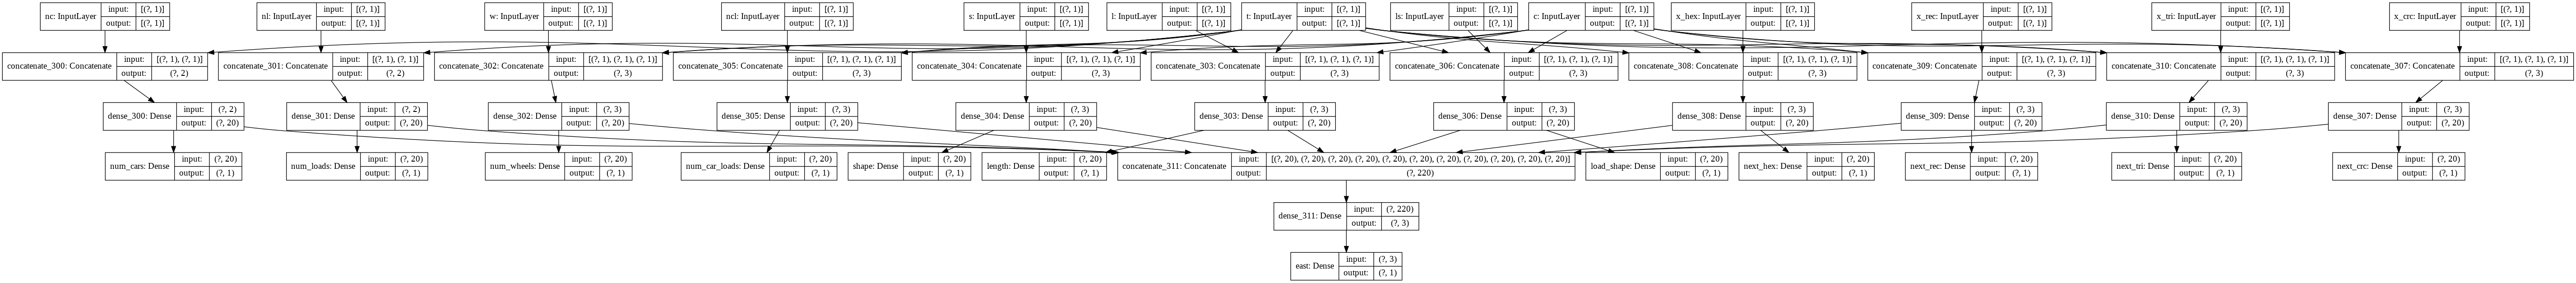

In [ ]:
plot_model(metanet, show_shapes=True, show_layer_names=True)

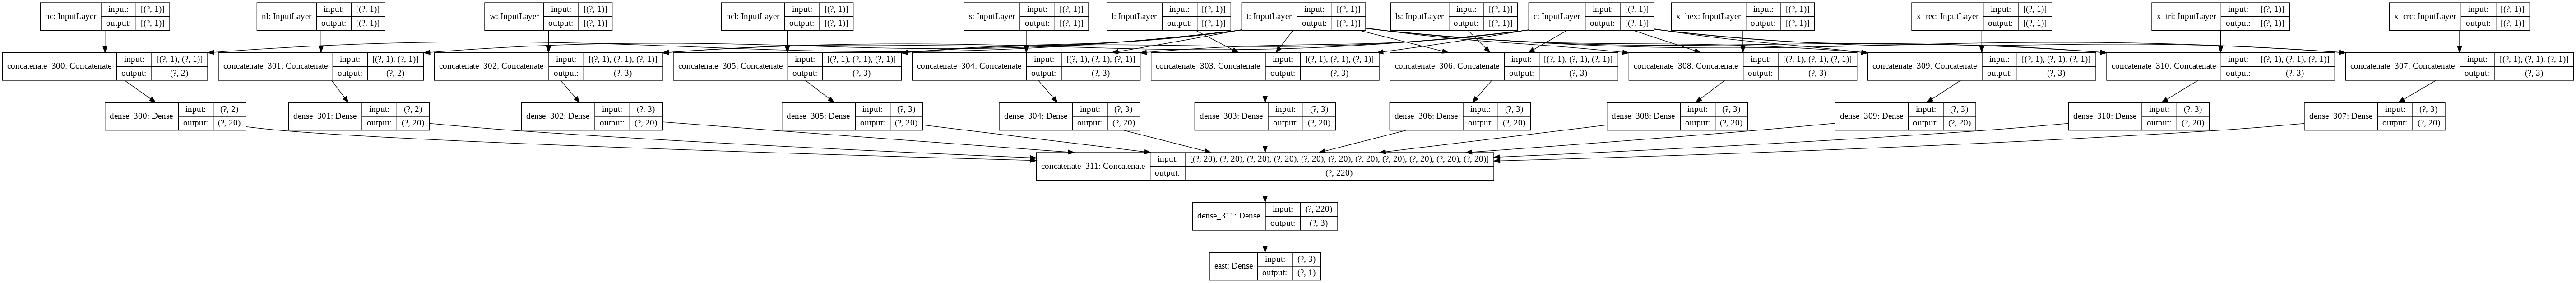

In [ ]:
plot_model(east, show_shapes=True, show_layer_names=True)

### transform data

In [ ]:
# transform data
df = read_data()
cols = [[c for c in df.columns if not(str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1])==n)] for n in range(1,5)]

data = [df[col] for col in cols]
for c, df in enumerate(data):
  df.columns = [name if not str.isdigit(name[-1]) else name[:-1] for name in df.columns]
  df['car'] = c+1

data = pd.concat(data)
data.reset_index(level=0, inplace=True)
data['train'] = data.pop('index')
data.T[0]

Number_of_cars                 5
Number_of_different_loads      4
num_wheels                     2
length                         1
shape                          6
num_loads                      3
load_shape                     2
Rectangle_next_to_rectangle    0
Rectangle_next_to_triangle     1
Rectangle_next_to_hexagon      0
Rectangle_next_to_circle       0
Triangle_next_to_triangle      0
Triangle_next_to_hexagon       1
Triangle_next_to_circle        0
Hexagon_next_to_hexagon        0
Hexagon_next_to_circle         1
Circle_next_to_circle          0
Class_attribute                1
car                            1
train                          0
Name: 0, dtype: int64

### Train

In [ ]:

def get_att(X):
  t = X['train'].T
  c = X['car'].T
  w = X['num_wheels'].T
  l = X['length'].T
  s = X['shape'].T
  nc = X['Number_of_cars'].T
  ls = X['load_shape'].T
  nl = X['Number_of_different_loads'].T
  ncl = X['num_loads'].T
  x_crc = np.sum(X[[col for col in X if col.endswith('circle')]], axis=1).T
  x_hex = np.sum(X[[col for col in X if col.endswith('hexagon')]], axis=1).T
  x_rec = np.sum(X[[col for col in X if col.endswith('rectangle')]], axis=1).T
  x_tri = np.sum(X[[col for col in X if col.endswith('triangle')]], axis=1).T

  return [t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri]

def split(data, val_train):
  x_train = data.query(f'train != {val_train}')
  x_test = data.query(f'train == {val_train}')
  y_train = np.array(x_train.pop('Class_attribute'))
  y_test = np.array(x_test.pop('Class_attribute'))
  x_train = get_att(x_train)
  x_test = get_att(x_test)
  return x_train, x_test, np.array(y_train), np.array(y_test)

In [ ]:
#training with east
kf = KFold(n_splits=10, shuffle=False)
hists = dict()
q2_names =  [
  'Train',
  'Cars Accuracy',
  'Output of flat network', 
  'Desired output', 
  'Class'
]
q2 = {name: [] for name in q2_names}

for val_train in tqdm.tqdm(range(0,10)):
  x_train, x_test, y_train, y_test = split(data, val_train)
  metanet, east, rules = model_v2()

  east.compile(
    loss = binary_crossentropy, 
    metrics = ['mse', 'binary_accuracy'])
  hist = east.fit(
    x_train,
    y_train,
    validation_data=[x_test, y_test],
    epochs=1000,
    verbose=0,)
  hists[val_train] = hist

  q2['Train'].append(val_train)
  q2['Output of flat network'].append(east.predict(x_test)[0][0])
  q2['Desired output'].append(y_test[0])
  q2['Class'].append(str_att['Class_attribute'][int(y_test[0])])


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:35<05:19, 35.56s/it]

 20%|██        | 2/10 [01:09<04:41, 35.16s/it]

 30%|███       | 3/10 [01:45<04:06, 35.26s/it]

 40%|████      | 4/10 [02:20<03:32, 35.37s/it]

 50%|█████     | 5/10 [02:56<02:57, 35.44s/it]

 60%|██████    | 6/10 [03:33<02:23, 35.82s/it]

 70%|███████   | 7/10 [04:06<01:44, 34.93s/it]

 80%|████████  | 8/10 [04:39<01:08, 34.42s/it]

 90%|█████████ | 9/10 [05:15<00:34, 34.90s/it]

100%|██████████| 10/10 [05:50<00:00, 35.08s/it]


In [ ]:
#training metanet
for val_train in tqdm.tqdm(range(0,10)):
  x_train, x_test, y_train, y_test = split(data, val_train)
  metanet, east, rules = model_v2()

  metanet.compile(
    loss = binary_crossentropy, 
    metrics = ['mse', 'binary_accuracy'])
  hist = metanet.fit(
    x_train,
    y_train,
    validation_data=[x_test, y_test],
    epochs=1000,
    verbose=0,)
  hists[val_train] = hist

  q2['Train'].append(val_train)
  q2['Output of flat network'].append(east.predict(x_test)[0][0])
  q2['Desired output'].append(y_test[0])
  q2['Class'].append(str_att['Class_attribute'][int(y_test[0])])

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:56<08:27, 56.42s/it]

 20%|██        | 2/10 [01:52<07:29, 56.17s/it]

 30%|███       | 3/10 [02:49<06:35, 56.48s/it]

 40%|████      | 4/10 [03:45<05:39, 56.52s/it]

 50%|█████     | 5/10 [04:44<04:45, 57.07s/it]

 60%|██████    | 6/10 [05:40<03:47, 56.86s/it]

 70%|███████   | 7/10 [06:37<02:50, 56.80s/it]

 80%|████████  | 8/10 [07:34<01:53, 56.87s/it]

 90%|█████████ | 9/10 [08:29<00:56, 56.46s/it]

100%|██████████| 10/10 [09:25<00:00, 56.55s/it]


## **Extracting active rules**

In [ ]:
weights = {
    'num_cars(t,nc)': metanet.get_weights()[25],
    'num_loads(t,nl)': metanet.get_weights()[27],
    'num_wheels(t,c,w)': metanet.get_weights()[29],
    'length(t,c,l)': metanet.get_weights()[31],
    'shape(t,c,s)': metanet.get_weights()[33],
    'num_car_loads(t,c,ncl)': metanet.get_weights()[35],
    'load_shape(t,c,ls)': metanet.get_weights()[37],
    'next_crc(t,c,x)': metanet.get_weights()[39],
    'next_hex_(t,c,x)': metanet.get_weights()[41],
    'next_rec(t,c,x)': metanet.get_weights()[43],
    'next_tri(t,c,x)': metanet.get_weights()[45],
}

Amax = 0.11    
active_rules = {
    "positive": [],
    "negative": [],
}

for rule in weights.keys():
  wij = weights[rule][0]
  if(Amax < wij and wij <=1):
    active_rules["positive"].append(rule)
  if(-1 <= wij and wij < -Amax):
    active_rules["negative"].append(rule)
    
active_rules

{'negative': [],
 'positive': ['num_loads(t,nl)', 'length(t,c,l)', 'num_car_loads(t,c,ncl)']}

### Results

In [ ]:
for i,history in enumerate(hists.values()):
  plt.plot(history.history['mean_squared_error'], c='tab:blue')
  plt.plot(history.history['val_mean_squared_error'], c='tab:orange')
  
plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


KeyError: ignored

In [ ]:
for i,history in enumerate(hists.values()):
  plt.plot(history.history['binary_accuracy'], c='tab:blue')
  plt.plot(history.history['val_binary_accuracy'], c='tab:orange')
  
plt.title('model binary_accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
t2 = pd.DataFrame.from_dict(q2).round(2)
t2['Cars Accuracy'] = [hists[i].history['binary_accuracy'][-1] for i in range(0,10)]
t2 = t2.reindex(columns=['Train', 'Cars Accuracy', 'Output of flat network', 'Desired output', 'Class'])
t2 

ValueError: ignored

{'Cars Accuracy': [],
 'Class': ['east',
  'east',
  'east',
  'east',
  'east',
  'west',
  'west',
  'west',
  'west',
  'west',
  'east',
  'east',
  'east',
  'east',
  'east',
  'west',
  'west',
  'west',
  'west',
  'west'],
 'Desired output': [1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0],
 'Output of flat network': [0.86358076,
  1.0,
  0.9999995,
  1.0,
  0.00013592839,
  0.00031393766,
  3.9218038e-09,
  0.14493105,
  1.5449292e-16,
  2.920105e-33,
  1.0,
  1.0,
  1.0,
  0.8620572,
  0.40006572,
  1.7178207e-06,
  2.4833976e-12,
  1.8077777e-15,
  3.1540035e-18,
  2.8633584e-21],
 'Train': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}